## Análisis Exploratorio de Datos

Se importan las librerias necesarias.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
sns.set()

Se procede a la carga los datasets

In [6]:
df = pd.read_csv('Datasets/Plataformas.csv', delimiter=';')
df_score = pd.read_csv('Datasets/score_movies.csv')

Se toma una muestra de los datasets, para un primer análisis de los datos.

In [8]:
df.sample(3)

,id,plataform,type,title,director,cast,country,date_added,release_year,rating,duration,duration_int,duration_type,listed_in,description
17045,ns2855,netflix,tv show,akame ga kill!,Sin_dato,"sora amamiya, soma saito, yukari tamura, yuu a...",japan,2020-03-01,2014,tv-14,1 season,1,season,"anime series, crime tv shows, international tv...",tatsumi sets out on a journey to help his poor...
9719,ds52,disney,tv show,disney amphibia,Sin_dato,"justin felbinger, amanda leighton, bill farmer...","united states, south korea",2021-11-03,2018,tv-y7,3 seasons,3,season,"animation, comedy, family",anne boonchuy is transported to the world of a...
7806,as7807,amazon,movie,into the fire,jane howell,"donal mccann, sue johnston, sharon duce, david...",NaN,Sin_dato,1996,16+,119 min,119,min,drama,"with his business in severe trouble, frank can..."


In [9]:
df_score.sample(3)

,userId,rating,timestamp,movieId
9111418,266588,3.0,2000-03-08,ns3568
3040372,31773,4.5,2005-06-17,ns518
9859682,111914,3.5,2004-06-02,ns157


Se evalúa la información del dataset, como Dtype y nulos.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             22998 non-null  object
 1   plataform      22998 non-null  object
 2   type           22998 non-null  object
 3   title          22998 non-null  object
 4   director       22998 non-null  object
 5   cast           22998 non-null  object
 6   country        11499 non-null  object
 7   date_added     22998 non-null  object
 8   release_year   22998 non-null  int64 
 9   rating         22998 non-null  object
 10  duration       22811 non-null  object
 11  duration_int   22998 non-null  int64 
 12  duration_type  22811 non-null  object
 13  listed_in      22998 non-null  object
 14  description    22994 non-null  object
dtypes: int64(2), object(13)
memory usage: 2.6+ MB


In [12]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.4+ MB


Se busca la presencia de valores duplicados.

In [16]:
df.duplicated().value_counts()

False    22998
dtype: int64

In [14]:
df_score.duplicated().value_counts()

False    11013823
True        10466
dtype: int64

Utilizando Pandas profiling se procede al análisis de los datasets.

In [17]:
profile = ProfileReport(df, title="Pandas Profiling Report de las plataformas")

In [19]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
profile = ProfileReport(df_score, title="Pandas Profiling Report del scored de los usuarios")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\duque\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:02<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Como en la columna 'country' la mitad de los datos faltan y que además no aporta al posterior modelo, se procede a su eliminación.

In [34]:
df.drop(columns='country', inplace=True)

Al igual que en la columna anterior, se elimina la columna 'date_added'

In [35]:
df.drop(columns='date_added', inplace=True)

Al haber una fuerte correlación entre las columnas 'type' y 'duration_type' se procede a la eliminación de una de ellas.

In [36]:
df.drop(columns='type', inplace=True)

In [21]:
dt_null_num = len(df[(df['duration_type'].isnull()) & (df['type'] == 'movie')])
print(f'Cantidad de nulos en duration_type con type = movie: ', dt_null_num)
dt_null_num = len(df[(df['duration_type'].isnull()) & (df['type'] == 'tv show')])
print(f'Cantidad de nulos en duration_type con type = tv show: ', dt_null_num)

Cantidad de nulos en duration_type con type = movie:  187
Cantidad de nulos en duration_type con type = tv show:  0


Como los registros faltantes en 'duration_type' corresponden al 'type' = movie, se asigna el valor 'min' al mismo.

In [22]:
df.fillna({'duration_type' : 'min'}, inplace=True)

Ante la presencia de valores duplicados en el dataset 'df_score', se procede a su eliminanción.

In [33]:
df_score.drop_duplicates(inplace=True)

Se elimina la columna 'timestamp', por no representar valor para el posterior análisis.

In [ ]:
df_score.drop(columns='timestamp', inplace=True)

Se visualiza cómo se distribuye la variable score.


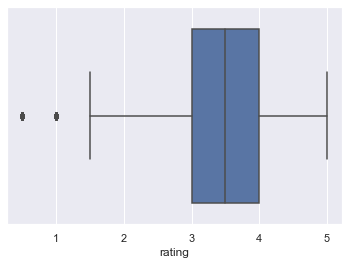

In [31]:
sns.boxplot(x = 'rating', data = df_score)
plt.show()

In [49]:
df.to_csv('plataformas_EDA.csv', index=False)

In [50]:
df_score.to_csv('score_movies_EDA.csv', index=False)